In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',100)

In [3]:
data=pd.read_csv('deliveries.csv')
ipl=pd.read_csv('matches.csv')
merged=ipl.merge(data,left_on='id',right_on='match_id')

In [4]:
merged.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In the below cells, before main function heading. I am finding z scores of players

# Batsman (20 overs)

In [5]:
total_runs=merged.groupby('batsman')['batsman_runs'].sum().reset_index()
balls_played=merged.groupby('batsman')['batsman_runs'].count().reset_index()
runs_balls_played_whole=total_runs.merge(balls_played,on='batsman')
runs_balls_played_whole.rename(columns={'batsman_runs_y':'balls_played','batsman_runs_x':'runs'},inplace=True)

runs_balls_played_whole['strike']=(runs_balls_played_whole['runs']/runs_balls_played_whole['balls_played'])*100

runs_balls_played_whole=runs_balls_played_whole[runs_balls_played_whole['balls_played']>=200]

In [6]:
mean_bat_whole=runs_balls_played_whole['strike'].mean()
std_bat_whole=runs_balls_played_whole['strike'].std()
runs_balls_played_whole['z']=(runs_balls_played_whole['strike']-mean_bat_whole)/std_bat_whole

In [7]:
runs_balls_played_whole.sort_values('strike',ascending=False).head()

,batsman,runs,balls_played,strike,z
30,AD Russell,574,350,164.000000,3.030419
86,CH Morris,439,275,159.636364,2.716882
143,GJ Maxwell,1229,780,157.564103,2.567985
196,KH Pandya,480,313,153.354633,2.265525
433,V Sehwag,2728,1833,148.827059,1.940208


# Bowlers (20 overs)

In [8]:
bowlers=merged.copy()
dismissal=['caught','bowled','lbw','stumped','caught and bowled','hit wicket']
total_wickets=bowlers[bowlers['dismissal_kind'].isin(dismissal)]

In [9]:
total_wickets=total_wickets.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).reset_index()
total_wickets.rename(columns={'player_dismissed':'wickets'},inplace=True)

In [10]:
runs_given=bowlers.groupby('bowler')['total_runs'].sum().reset_index()
runs_given.rename(columns={'total_runs':'runs'},inplace=True)

In [11]:
balls_bowled=bowlers.groupby('bowler')['total_runs'].count().reset_index()
balls_bowled.rename(columns={'total_runs':'balls_bowled'},inplace=True)

In [12]:
bowler_statistics_whole=total_wickets.merge(runs_given,on='bowler')
bowler_statistics_whole=bowler_statistics_whole.merge(balls_bowled,on='bowler')

In [13]:
bowler_statistics_whole['econ']=100-(bowler_statistics_whole['runs']/(bowler_statistics_whole['balls_bowled']/6))

In [14]:
bowler_statistics_whole=bowler_statistics_whole[bowler_statistics_whole['balls_bowled']>=200]

In [15]:
mean_bowl_whole=bowler_statistics_whole['econ'].mean()
std_bowl_whole=bowler_statistics_whole['econ'].std()

In [16]:
bowler_statistics_whole['z']=(bowler_statistics_whole['econ']-mean_bowl_whole)/std_bowl_whole

In [17]:
bowler_statistics_whole.sort_values('econ',ascending=False).head()

,bowler,wickets,runs,balls_bowled,econ,z
90,Sohail Tanvir,22,275,265,93.773585,2.391285
143,A Chandila,11,245,234,93.717949,2.309710
10,SP Narine,95,2085,1956,93.604294,2.143068
9,R Ashwin,100,2552,2359,93.509114,2.003512
142,SM Pollock,11,307,280,93.421429,1.874946


# Top 10 batsman in Dangerous Overs (16 to 20 overs)

In [18]:
mask=merged['over']>15
danger=merged[mask]

In [19]:
total_runs_danger=danger.groupby('batsman')['batsman_runs'].sum().reset_index()
total_runs_danger.rename(columns={'batsman_runs':'runs'},inplace=True)
total_balls_danger=danger.groupby('batsman')['batsman_runs'].count().reset_index()
total_balls_danger.rename(columns={'batsman_runs':'balls'},inplace=True)
batsman_statistics_danger=total_runs_danger.merge(total_balls_danger,on='batsman')
batsman_statistics_danger=batsman_statistics_danger[batsman_statistics_danger['balls']>=200]
batsman_statistics_danger['strike']=(batsman_statistics_danger['runs']/batsman_statistics_danger['balls'])*100

In [20]:
mean_bat_danger=batsman_statistics_danger['strike'].mean()
std_bat_danger=batsman_statistics_danger['strike'].std()

In [21]:
batsman_statistics_danger['z']=(batsman_statistics_danger['strike']-mean_bat_danger)/std_bat_danger

In [22]:
batsman_statistics_danger=batsman_statistics_danger.sort_values('z',ascending=False).head(10)

In [23]:
batsman_statistics_danger

,batsman,runs,balls,strike,z
21,AB de Villiers,1203,570,211.052632,2.641360
93,DA Warner,432,228,189.473684,1.629732
92,DA Miller,672,360,186.666667,1.498138
390,V Kohli,993,546,181.868132,1.273181
296,RG Sharma,1314,748,175.668449,0.982538
101,DJ Hussey,410,234,175.213675,0.961218
310,RV Uthappa,477,275,173.454545,0.878750
414,Yuvraj Singh,883,516,171.124031,0.769494
160,JH Kallis,394,231,170.562771,0.743182
237,MS Dhoni,2076,1224,169.607843,0.698415


# Top 10 bowlers in dangerous overs (16 to 20 overs)

In [24]:
total_runs_given_dang=danger.groupby('bowler')['total_runs'].sum().reset_index()
total_runs_given_dang.rename(columns={'total_runs':'runs'},inplace=True)
total_balls_dang=danger.groupby('bowler')['total_runs'].count().reset_index()
total_balls_dang.rename(columns={'total_runs':'balls'},inplace=True)
bowler_stats_danger=total_runs_given_dang.merge(total_balls_dang,on='bowler')
bowler_stats_danger=bowler_stats_danger[bowler_stats_danger['balls']>=200]
bowler_stats_danger['econ']=100-(bowler_stats_danger['runs']/(bowler_stats_danger['balls']/6))

In [25]:
mean_bowl_dang=bowler_stats_danger['econ'].mean()
std_bowl_dang=bowler_stats_danger['econ'].std()

In [26]:
bowler_stats_danger['z']=(bowler_stats_danger['econ']-mean_bowl_dang)/std_bowl_dang

In [27]:
bowler_stats_danger=bowler_stats_danger.sort_values('z',ascending=False).head(10)

In [28]:
bowler_stats_danger

,bowler,runs,balls,econ,z
254,SP Narine,790,664,92.861446,2.090835
76,DE Bollinger,297,242,92.636364,1.846308
248,SL Malinga,1300,1050,92.571429,1.775762
161,MA Starc,265,210,92.428571,1.620563
199,R Ashwin,479,379,92.416887,1.607869
90,DW Steyn,806,624,92.250000,1.426564
157,M Muralitharan,380,284,91.971831,1.124363
101,Harbhajan Singh,348,258,91.906977,1.053906
293,WD Parnell,289,214,91.897196,1.043280
62,CH Morris,529,381,91.669291,0.795686


# Main function

In the previous cells. i have found out batsman and bowlers z scores in all 20 overs and in dangerous overs,
now my point of view is such that
- Compare the z scores of batsman and bowler in all 20 over table (runs_balls_played_whole, and bowler_statistics_whole), and according either increase result_bat or result_bowl variable by 1 for the player having high z score
- Compare the z scores of batsman and bowler in danger overs (16 to 20) using tables (batsman_statistics_danger, and bowler_stats_danger), and according either increase result_bat or result_bowl variable by 1 for the player having high z score
- If one of the two players aren't listed in danger overs table, in that case, the player listed in the danger table will have +2 in his result variable. thus making him a better player over the other

variables to use are:
- runs_balls_played_whole: batsman (20 overs)
- bowler_statistics_whole: bowlers (20 overs)
- batsman_statistics_danger: batsmen in danger overs
- bowler_stats_danger: bowlers in danger overs

In [29]:
def batsmen_bowler_present(batsman_name,bowler_name):
    """Used to check if the given names are valid or not"""
    batsman_present=False
    bowler_present=False
    # Checking whether the name is correct by matching it with all batsman,bowler unique names
    if batsman_name in list(runs_balls_played_whole['batsman'].unique()) and bowler_name in list(bowler_statistics_whole['bowler'].unique()):
        return True

In [30]:
def dataframe_info_sender(batsman_name,bowler_name):
    """Sending dataframes of the given batsman and bowler"""
    batsman_whole=runs_balls_played_whole[runs_balls_played_whole['batsman']==batsman_name]
    batsman_danger=batsman_statistics_danger[batsman_statistics_danger['batsman']==batsman_name]
    bowler_whole=bowler_statistics_whole[bowler_statistics_whole['bowler']==bowler_name]
    bowler_danger=bowler_stats_danger[bowler_stats_danger['bowler']==bowler_name]
    return (batsman_whole,batsman_danger,bowler_whole,bowler_danger)

In [31]:
def compare(batsman_name,bowler_name):
    """compare(batsman_name,bowler_name) function let's you compare a batsman and a bowler and then prints who is a better
    T20 player. The result depends upon the players strike rate/ economy in all 20 overs,
    and specially the performance of a player in the dangerous overs."""
    # Checking if names are valid and can be compared
    # condition for comparing is both the given names must have played more than 200 balls.
    if batsmen_bowler_present(batsman_name,bowler_name):
        
        # Getting the info related to the given names
        
        batsman_whole,batsman_danger,bowler_whole,bowler_danger = dataframe_info_sender(batsman_name,bowler_name)
        
        # The below variables are used to know whether batsman and bowler are in the top 10 list of danger overs
        
        bat_dang_length = len(batsman_danger) 
        bowl_dang_length = len(bowler_danger)
        
        # result_bat and result_bowl are used to give points to the batsman or bowler if he is found to be a better 
        # player with the given below conditions.
        
        result_bat = 0
        result_bowl = 0
        
        # Checking for better player in all 20 overs using z scores
        
        if batsman_whole['z'].values[0] > bowler_whole['z'].values[0]:
            result_bat=result_bat+1
            
        elif batsman_whole['z'].values[0] < bowler_whole['z'].values[0]:
            result_bowl=result_bowl+1
            
        elif batsman_whole['z'].values[0] == bowler_whole['z'].values[0]:
            result_bat=result_bat+1
            result_bowl=result_bowl+1
            
        # Checking for better player in dangerous overs using z score
        
        # If both bowler and batsman are in top 10 list of danger over players with high strike rate/econ.
        
        if bat_dang_length > 0 and bowl_dang_length > 0:
            if batsman_danger['z'].values[0] > bowler_danger['z'].values[0]:
                result_bat+=1
                
            elif batsman_danger['z'].values[0] < bowler_danger['z'].values[0]:
                result_bowl+=1
                
            elif batsman_danger['z'].values[0] == bowler_danger['z'].values[0]:
                result_bat+=1
                result_bowl+=1
                
        # If the given batsman is in the top 10 list of danger overs and bowler isn't        
        
        elif bat_dang_length == 0 and bowl_dang_length > 0:
            result_bowl+=2
            
        # If the given batsman is not in top 10 list and bowler is    
        
        elif bat_dang_length > 0 and bowl_dang_length == 0:
            result_bat+=2
            
        # Comparing points given in above condition and printing result    
        
        if result_bat > result_bowl:
            print(batsman_name,'is a better T20 player than',bowler_name)
        elif result_bat < result_bowl:
            print(bowler_name,'is better T20 player than',batsman_name)
        elif result_bat == result_bowl:
            print(batsman_name,'and',bowler_name,'are of same level')
    else:
        
        # If batsman/bowler are not valid names or they aren't comparable because of not played more than 200 balls. 
        
        print('Sorry, either your player names are incorrect or they haven\'t played more than 200 balls in T20',end='')
        print('. Thus are not comparable.')

In [32]:
len(runs_balls_played_whole[runs_balls_played_whole['batsman']=='V Kohli'])

1

In [33]:
compare('V Kohli','Harbhajan Singh')

V Kohli and Harbhajan Singh are of same level


In [34]:
compare('V Kohli','Sohail Tanvir') # Because sohail isnt listed in danger table while virat is

V Kohli is a better T20 player than Sohail Tanvir


In [35]:
compare('V Kohli','SP Narine')

SP Narine is better T20 player than V Kohli


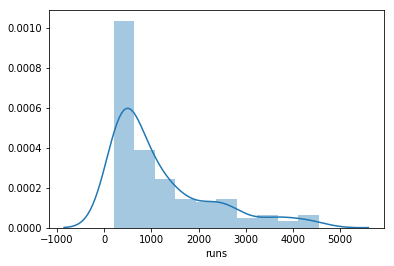

In [39]:
sns.distplot(runs_balls_played_whole['runs'])

In [40]:
runs_balls_played_whole['runs'].skew() #batsmans runs

1.4310810113002579

In [41]:
runs_balls_played_whole['runs'].describe()

count     142.000000
mean     1176.795775
std      1060.249459
min       198.000000
25%       391.750000
50%       752.500000
75%      1593.750000
max      4548.000000
Name: runs, dtype: float64

In [42]:
bowler_statistics_whole['econ']=(bowler_statistics_whole['runs']/(bowler_statistics_whole['balls_bowled']/6))

In [43]:
bowler_statistics_whole['econ'].skew() #econ of a bowler

0.030917413079594218

In [44]:
bowler_statistics_whole['econ'].describe()

count    174.000000
mean       7.857333
std        0.682026
min        6.226415
25%        7.401192
50%        7.816277
75%        8.372899
max        9.451737
Name: econ, dtype: float64

In [119]:
merged=merged[merged['result']=='normal']

In [45]:
merged.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [120]:
a=merged.groupby(['season','match_id','inning'])['total_runs'].sum()

In [121]:
a.describe()

count    1252.000000
mean      153.009585
std        30.879564
min        44.000000
25%       134.000000
50%       155.000000
75%       173.000000
max       263.000000
Name: total_runs, dtype: float64

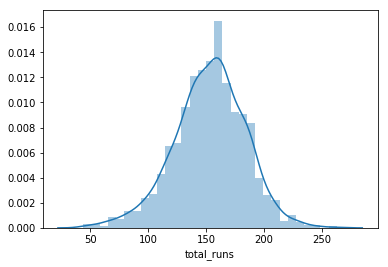

In [122]:
sns.distplot(a)

In [123]:
a.skew()

-0.2602992227312367